# Lab 4

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/giswqs/geog-312/blob/main/book/labs/lab_04.ipynb)

This lab will help you solidify your understanding of working with `NumPy`, `Pandas`, and `GeoPandas` for geospatial data analysis. Through these exercises, you will perform data manipulation, spatial analysis, and visualizations by combining these powerful libraries.

## Exercise 1: NumPy Array Operations and Geospatial Coordinates

In this exercise, you will work with NumPy arrays representing geospatial coordinates (latitude and longitude) and perform basic array operations.

1. Create a 2D NumPy array containing the latitude and longitude of the following cities: Tokyo (35.6895, 139.6917), New York (40.7128, -74.0060), London (51.5074, -0.1278), and Paris (48.8566, 2.3522).
2. Convert the latitude and longitude values from degrees to radians using np.radians().
3. Calculate the element-wise difference between Tokyo and the other cities' latitude and longitude in radians.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import contextily as cx

In [3]:
cities_array = np.array([[35.6895, 139.6917],    
                         [40.7128, -74.0060],    
                         [51.5074, -0.1278],     
                         [48.8566, 2.3522]])     


In [4]:
cities_radians = np.radians(cities_array)


In [5]:
tokyo_radians = cities_radians[0] 
differences = cities_radians - tokyo_radians 

print("Cities in radians:\n", cities_radians)
print("\nElement-wise differences between Tokyo and other cities in radians:\n", differences)

Cities in radians:
 [[ 6.22899283e-01  2.43808010e+00]
 [ 7.10572408e-01 -1.29164837e+00]
 [ 8.98973719e-01 -2.23053078e-03]
 [ 8.52708531e-01  4.10536347e-02]]

Element-wise differences between Tokyo and other cities in radians:
 [[ 0.          0.        ]
 [ 0.08767312 -3.72972847]
 [ 0.27607444 -2.44031063]
 [ 0.22980925 -2.39702647]]


## Exercise 2: Pandas DataFrame Operations with Geospatial Data

In this exercise, you'll use Pandas to load and manipulate a dataset containing city population data, and then calculate and visualize statistics.

1. Load the world cities dataset from this URL using Pandas: https://github.com/opengeos/datasets/releases/download/world/world_cities.csv
2. Display the first 5 rows and check for missing values.
3. Filter the dataset to only include cities with a population greater than 1 million.
4. Group the cities by their country and calculate the total population for each country.
5. Sort the cities by population in descending order and display the top 10 cities.

In [6]:
world_cities = pd.read_csv('https://github.com/opengeos/datasets/releases/download/world/world_cities.csv')

In [7]:
world_cities.head()

,id,name,country,latitude,longitude,population
0,1,Bombo,UGA,0.5833,32.5333,75000
1,2,Fort Portal,UGA,0.6710,30.2750,42670
2,3,Potenza,ITA,40.6420,15.7990,69060
3,4,Campobasso,ITA,41.5630,14.6560,50762
4,5,Aosta,ITA,45.7370,7.3150,34062


In [8]:
cities_over_1m = world_cities.query('population > 1000000')


In [9]:
cities_by_country = world_cities.groupby(by = 'country').agg({'population': 'sum'})
cities_by_country.head()

,population
country,
AFG,4931702
AGO,6821544
ALB,895350
ALD,10682
AND,53998


In [10]:
world_cities_sorted = world_cities.sort_values(by = 'population', ascending=False)
world_cities.head(10)

,id,name,country,latitude,longitude,population
0,1,Bombo,UGA,0.58330,32.53330,75000
1,2,Fort Portal,UGA,0.67100,30.27500,42670
2,3,Potenza,ITA,40.64200,15.79900,69060
3,4,Campobasso,ITA,41.56300,14.65600,50762
4,5,Aosta,ITA,45.73700,7.31500,34062
5,6,Mariehamn,ALD,60.09700,19.94900,10682
6,7,Ramallah,PSE,31.90294,35.20621,24599
7,8,Vatican City,VAT,41.90001,12.44781,832
8,9,Poitier,FRA,46.58329,0.33328,85960
9,10,Clermont-Ferrand,FRA,45.77998,3.08001,233050


## Exercise 3: Creating and Manipulating GeoDataFrames with GeoPandas

This exercise focuses on creating and manipulating GeoDataFrames, performing spatial operations, and visualizing the data.

1. Load the New York City building dataset from the GeoJSON file using GeoPandas: https://github.com/opengeos/datasets/releases/download/places/nyc_buildings.geojson
2. Create a plot of the building footprints and color them based on the building height (use the `height_MS` column).
3. Create an interactive map of the building footprints and color them based on the building height (use the `height_MS` column).
4. Calculate the average building height (use the `height_MS` column).
5. Select buildings with a height greater than the average height.
6. Save the GeoDataFrame to a new GeoJSON file.

In [11]:
import geopandas as gpd

In [12]:
nyc= gpd.read_file('https://github.com/opengeos/datasets/releases/download/places/nyc_buildings.geojson')

In [13]:
nyc.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1206 entries, 0 to 1205
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   fid         1206 non-null   int64   
 1   height_MS   1117 non-null   float64 
 2   height_FM   1029 non-null   float64 
 3   height_avg  1169 non-null   float64 
 4   SQMETERS    1206 non-null   float64 
 5   STATEFP     1206 non-null   object  
 6   NAME        1206 non-null   object  
 7   geometry    1206 non-null   geometry
dtypes: float64(4), geometry(1), int64(1), object(2)
memory usage: 75.5+ KB


<Axes: >

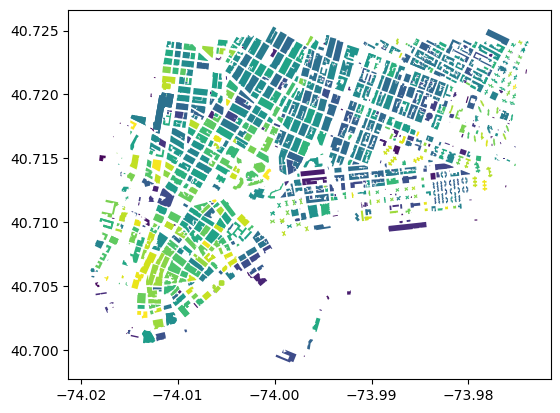

In [14]:
nyc.plot(column='height_MS')

In [15]:
ave_height = nyc['height_MS'].mean()
print(f"The average building height is {ave_height}")

The average building height is 15.454691136974038


In [16]:
above_ave = nyc[nyc['height_MS'] > ave_height]

above_ave.to_file('buildings_with_above_average_height', driver='GeoJSON')


## Exercise 4: Combining NumPy, Pandas, and GeoPandas

This exercise requires you to combine the power of NumPy, Pandas, and GeoPandas to analyze and visualize spatial data.

1. Use Pandas to load the world cities dataset from this URL: https://github.com/opengeos/datasets/releases/download/world/world_cities.csv
2. Filter the dataset to include only cities with latitude values between -40 and 60 (i.e., cities located in the Northern Hemisphere or near the equator).
3. Create a GeoDataFrame from the filtered dataset by converting the latitude and longitude into geometries.
4. Reproject the GeoDataFrame to the Mercator projection (EPSG:3857).
5. Calculate the distance (in meters) between each city and the city of Paris.
6. Plot the cities on a world map, coloring the points by their distance from Paris.

In [17]:
cities = pd.read_csv(' https://github.com/opengeos/datasets/releases/download/world/world_cities.csv')

In [18]:
filtered_cities = cities.query('latitude > -40 and latitude < 60')

In [19]:
filtered_cities['geometry'] = gpd.points_from_xy(filtered_cities['longitude'],filtered_cities['latitude'])

/var/folders/7q/kmvb4ny545l2vh_5y66fqx8r0000gn/T/ipykernel_97424/514669582.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_cities['geometry'] = gpd.points_from_xy(filtered_cities['longitude'],filtered_cities['latitude'])


In [20]:
filtered_cities = gpd.GeoDataFrame(filtered_cities, geometry='geometry')

filtered_cities = filtered_cities.set_crs('EPSG:3857')

In [21]:
def haversine_np(lat1, lon1, lat2, lon2):
    R = 6371000
    dlat = np.radians(lat2 - lat1)
    dlon = np.radians(lon2 - lon1)
    a = (
        np.sin(dlat / 2) ** 2
        + np.cos(np.radians(lat1)) * np.cos(np.radians(lat2)) * np.sin(dlon / 2) ** 2
    )
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    distance = R * c
    return distance

In [22]:
paris_lat = filtered_cities[filtered_cities['name']=='Paris']['latitude']
paris_lon = filtered_cities[filtered_cities['name']=='Paris']['longitude']


In [23]:
filtered_cities['distance_to_paris'] = filtered_cities.apply(lambda row: haversine_np(paris_lat, paris_lon, row['latitude'], row['longitude']),axis=1)

/var/folders/7q/kmvb4ny545l2vh_5y66fqx8r0000gn/T/ipykernel_97424/2370388442.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


<Axes: >

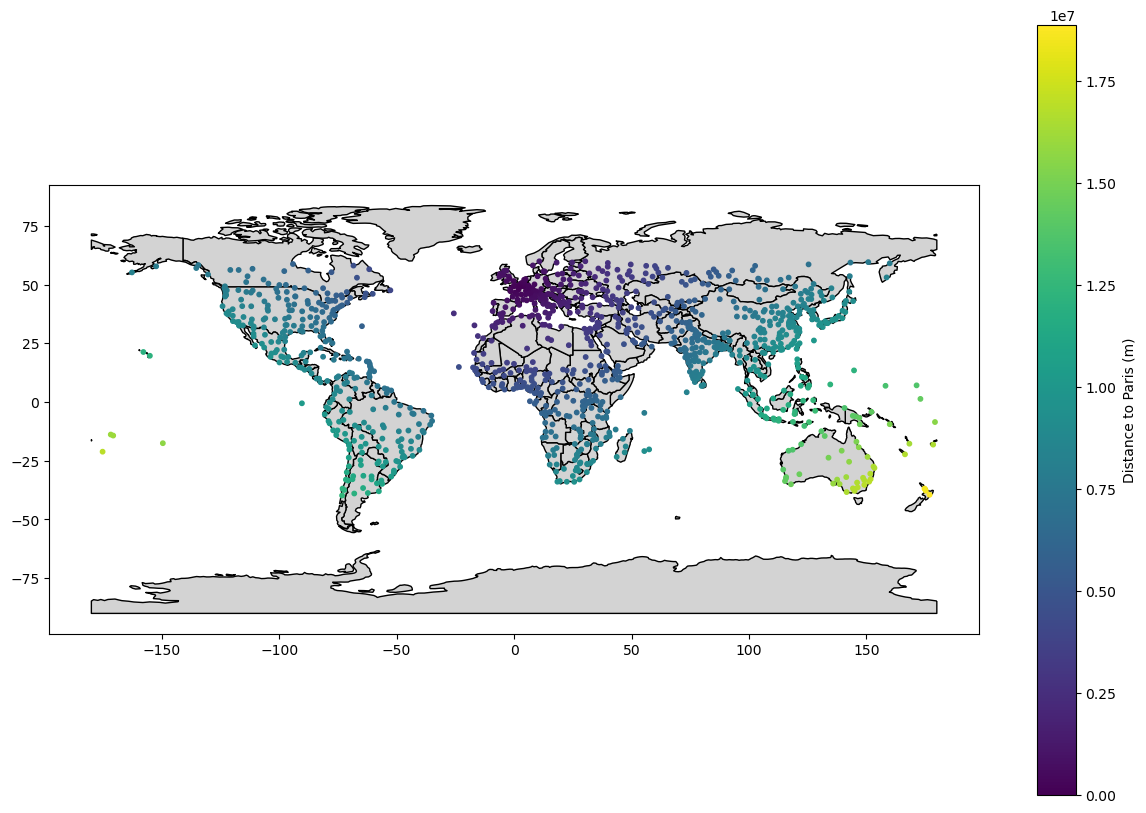

In [26]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

fig, ax = plt.subplots(figsize=(15, 10))
world.plot(ax=ax, color='lightgrey', edgecolor='black')
filtered_cities.plot(ax=ax, column='distance_to_paris',  markersize=10,
                     legend=True, legend_kwds={'label': "Distance to Paris (m)"})
